In [2]:
from sklearn.metrics import roc_curve
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)

shape of x_train:  (60000, 28, 28)
shape of x_test:  (10000, 28, 28)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 908us/step - loss: 0.2952 - accuracy: 0.9144 - val_loss: 0.1428 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 2s 852us/step - loss: 0.1414 - accuracy: 0.9579 - val_loss: 0.1002 - val_accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 2s 873us/step - loss: 0.1066 - accuracy: 0.9679 - val_loss: 0.0923 - val_accuracy: 0.9724
Epoch 4/10
1875/1875 [==============================] - 2s 849us/step - loss: 0.0868 - accuracy: 0.9733 - val_loss: 0.0783 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.0748 - accuracy: 0.9764 - val_loss: 0.0768 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 2s 826us/step - loss: 0.0651 - accuracy: 0.9794 - val_loss: 0.0679 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.0568 - accuracy: 0.9816 - val_loss: 0.0718 -

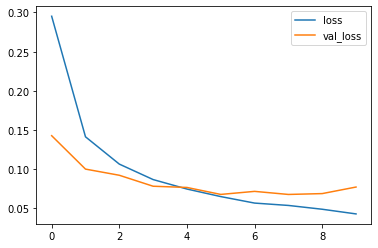

In [9]:
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

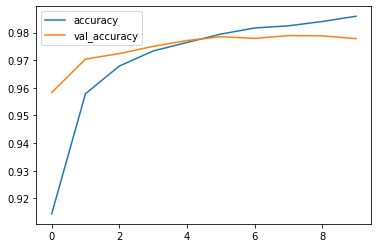

In [10]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

In [11]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 529us/step - loss: 0.0773 - accuracy: 0.9778
[0.07729479670524597, 0.9778000116348267]


Confusion matrix without normalization
[[ 967    0    1    0    1    2    3    2    4    0]
 [   0 1124    3    2    0    0    2    1    3    0]
 [   3    1  999    3    1    0    3   11   11    0]
 [   1    0    1  988    0    6    0    8    3    3]
 [   2    0    0    0  952    0    6    7    0   15]
 [   3    0    0    8    2  870    3    1    2    3]
 [   4    3    0    1    3   10  936    0    1    0]
 [   0    4    7    1    0    1    0 1009    1    5]
 [   2    1    2    4    3    4    1    7  947    3]
 [   1    2    1    3    4    3    0    9    0  986]]


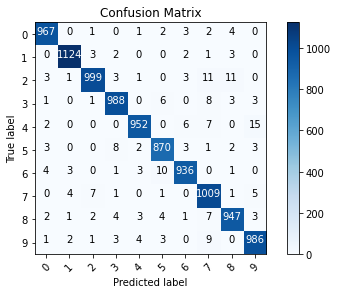

In [12]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
    

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))   

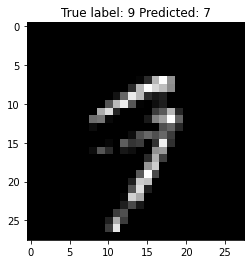

In [13]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [ ]:
from sklearn.metrics import roc_curve, auc

history = model.fit(x_train, y_train, validation_data=(
        x_test, y_test), epochs=10 )

y_pred = model.predict(x_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)